In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np



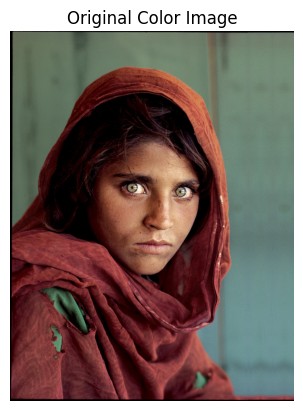

Image shape: (1024, 786, 3)
Image data type: uint8
Image value range: [0, 255]
Red channel - U: (1024, 786), S: (786,), Vt: (786, 786)
Red channel - U: (1024, 786), S: (786,), Vt: (786, 786)
Green channel - U: (1024, 786), S: (786,), Vt: (786, 786)
Green channel - U: (1024, 786), S: (786,), Vt: (786, 786)
Blue channel - U: (1024, 786), S: (786,), Vt: (786, 786)
Blue channel - U: (1024, 786), S: (786,), Vt: (786, 786)


In [7]:
# Load the color image
A = imread('/app/sreeram/datascience/image2.jpg')

# Show original color image
plt.figure()
plt.title('Original Color Image')
plt.imshow(A)
plt.axis('off')
plt.show()

print(f'Image shape: {A.shape}')
print(f'Image data type: {A.dtype}')
print(f'Image value range: [{A.min()}, {A.max()}]')

# Normalize image to [0, 1] if needed
if A.max() > 1:
    A = A / 255.0

# Apply SVD to each color channel separately
U_channels = []
S_channels = []
Vt_channels = []

for i, color in enumerate(['Red', 'Green', 'Blue']):
    U_c, S_c, Vt_c = np.linalg.svd(A[:, :, i], full_matrices=False)
    U_channels.append(U_c)
    S_channels.append(S_c)
    Vt_channels.append(Vt_c)
    print(f'{color} channel - U: {U_c.shape}, S: {S_c.shape}, Vt: {Vt_c.shape}')

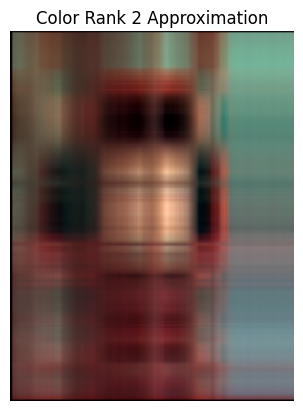

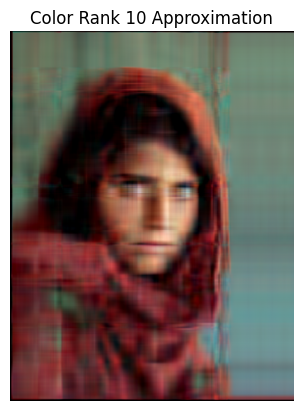

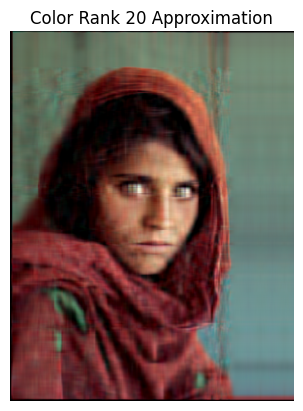

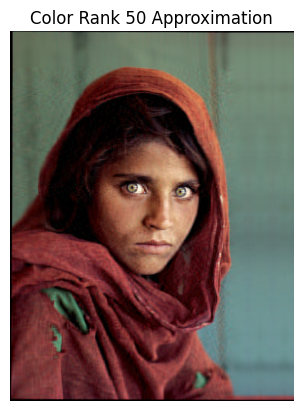

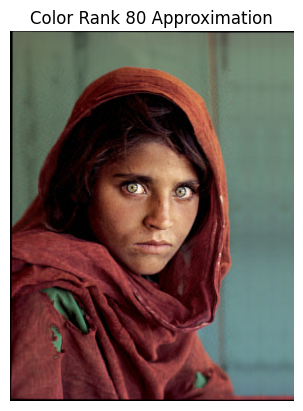

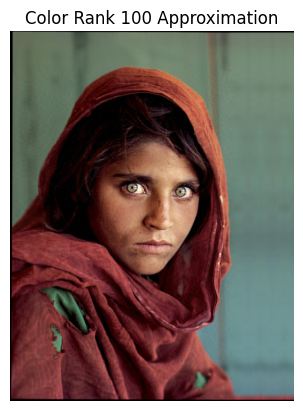

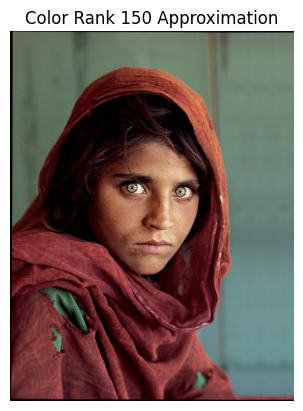

In [ ]:
# Reconstruct color images at different ranks
ranks = [2, 10, 20, 50, 80, 100, 150]

for r in ranks:
    # Reconstruct each channel
    reconstructed = np.zeros_like(A)
    for i in range(3):
        S_diag = np.diag(S_channels[i])
        # We reconstruct the channel using the first r singular values/vectors
        reconstructed[:, :, i] = U_channels[i][:, :r] @ S_diag[:r, :r] @ Vt_channels[i][:r, :]
    
    # Clip values to valid range [0, 1]
    # SVD reconstruction produces values that may be slightly out of bounds. 
    # this is due to floating point arithmetic errors. So we clip them.
    reconstructed = np.clip(reconstructed, 0, 1)
    
    plt.figure()
    plt.title(f'Color Rank {r} Approximation')
    plt.imshow(reconstructed)
    plt.axis('off')
    plt.show()

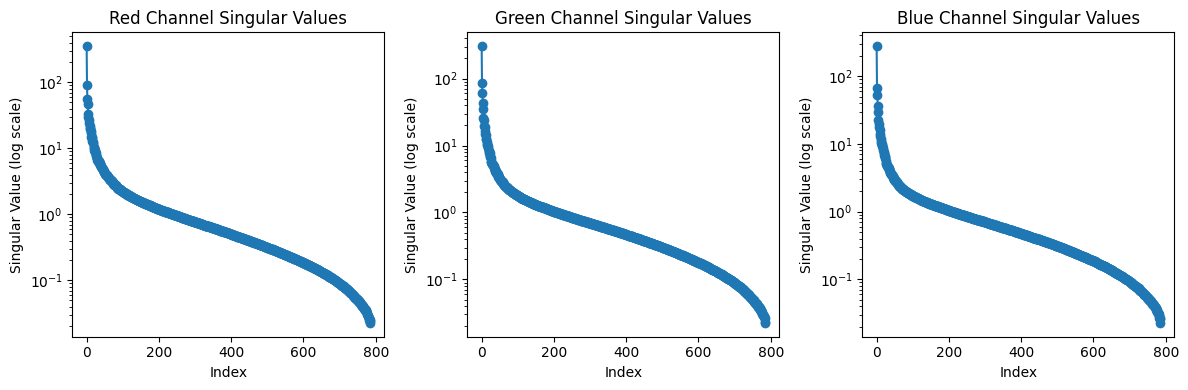

In [4]:
# Plot singular values for each channel
plt.figure(figsize=(12, 4))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(1, 3, i+1)
    plt.semilogy(S_channels[i], '-o')
    plt.title(f'{color} Channel Singular Values')
    plt.xlabel('Index')
    plt.ylabel('Singular Value (log scale)')
plt.tight_layout()
plt.show()

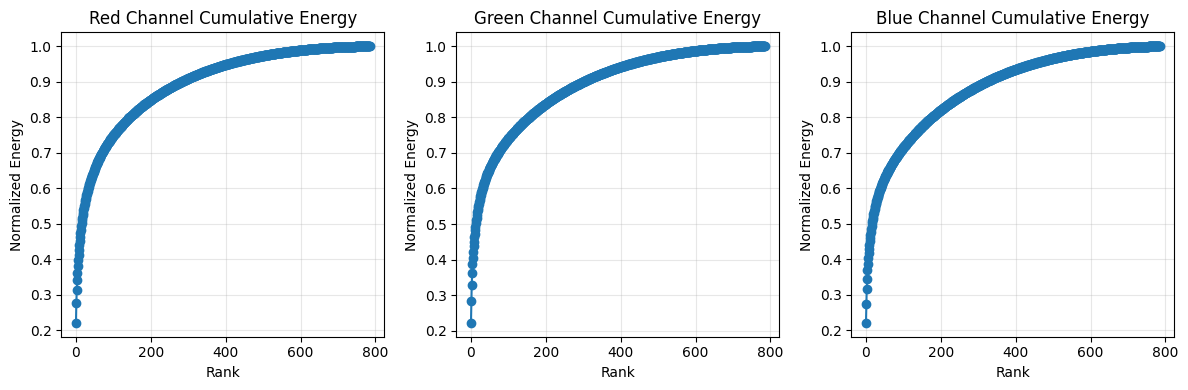

In [5]:
# Plot cumulative energy for each channel
plt.figure(figsize=(12, 4))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(1, 3, i+1)
    cumsum = np.cumsum(S_channels[i]) / np.sum(S_channels[i])
    plt.plot(cumsum, 'o-')
    plt.title(f'{color} Channel Cumulative Energy')
    plt.xlabel('Rank')
    plt.ylabel('Normalized Energy')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()